## Sentiment Analyisis of Customer Review Data Using NLP and Neural Networks

### Tejaswini Shekar

______________________

### Table of Contents

I. Research Question

- [A1. Research Question](#a1-research-question)
- [A2. Goal of Analysis](#a2-goal-of-analysis)
- [A3. Prescribed Network](#a3-prescribed-network)

II. Data Preparation

- [B1. Data Exploration](#b1-data-exploration)
- [B2. Tokenization](#b2-tokenization)
- [B3. Padding Process](#b3-padding-process)
- [B4. Categories of Sentiment](#b4-categories-of-sentiment)
- [B5. Steps to Prepare Data](#b5-steps-to-prepare-data)
- [B6. Prepared Data Set](#b6-prepared-data-set)


III. Network Architecture

- [C1. Model Summary](#c1-model-summary)
- [C2. Network Architecture](#c2-network-architecture)
- [C3. Hyperparameters](#c3-hyperparameters)

IV. Model Evaluation

- [D1. Stopping Criteria](#d1-stopping-criteria)
- [D2. Fitness](#d2-fitness)
- [D3. Training Process](#d3-training-process)
- [D4. Predictive Accuracy](#d4-predictive-accuracy)

V. Summary and Recommendations

- [E. Code](#e-code)
- [F. Functionality](#f-functionality)
- [G. Recommendations](#g-recommendations)

VI. Reporting

- [H. Reporting](#h-reporting)
- [I. Sources](#i-sources)


### A1. Research Qestion

My reserch question is, "Is it possible to conduct sentiment analysis using neural networks on the three customer review datasets to determine whether each review is positive or negative?".

### A2. Goal of Analysis

The primary goal of the analysis is to identify positive and negative sentiments in the customer review data using neural networks and natural language processing. The results of the analysis can then be used to recommend an appropriate course of action for the companies.

### A3. Prescribed Network

Neural networks are a series of algorithms that aim to recognize relationships in data through a process mirroring the working of the human brain. Natural language processing involves using computer technology to manipulate human language (eg. email filters, search engines).

In this PA, an RNN (recurrent neural network) will be used to analyze customer review data from three websites and identify positive and negative sentiments in them.

I have chosen an RNN for this analysis because it works well with sequential data. Text classification tasks such as sentiment analysis have sequential/temporal data. This means that the data is present in a sequence one after the other, like words in a sentence. Therefore using an RNN would be ideal for this analysis.

### B1. Data Exploration

The three data sets (Amazon, Yelp and IMDB) were imported and combined into a single dataframe. The data was explored initially using the .head(), .info() and .shape methods. The data has two columns, "Review" and "Sentiment", with a total of 3000 rows/records. The "Sentiment" column has binary values of either 1 or 0 depending on whether the review is positive or negative.

The total number of positive and negative reviews were visualized using a countplot and both were found to be equal (1500 each). The review lengths were also visualized using a histogram.

It was verified that there were no null values in the data.

The reviews were all lowercased.

1. Irregular Characters:
The data was checked for the presence of any irregular characters (eg. non-english characters, emojis, numbers). The initial total character count was 63. The data was then cleaned by removing irregular characters, numbers and punctuation. The final character count after lowercasing and removing irregular characters was 27 (26 lowercase alphabets and the space " " character).

2. Vocabulary Size:
It is the number of unique/tokenized words present in the data set across all reviews.
The initial vocabulary size was 5092 prior to data processing.
The final vocabulary size after tokenization, removal of stop words and lemmetization was **4559**. It was calculated using the Tokenizer() class from tensorflow.keras.preprocessing.text.

3. Word Embedding Length:
Embedding length is the number of words/characters in an input sequence.
It can be computed as the fourth root of the vocabualry size (square root of the square root), rounded to the nearest integer. The word embedding length calculated by taking the fourth root of 4559 is 8.

*However*, according to the powerpoint provided by Dr. Sewell and this article by [Kwan, 2023](#i-sources) on word embeddings, *the optimal size of embedding is anywhere between 100 to 300*. Given this information, I deem it more appropriate to used a word embedding length of **100** for the neural network to ensure the best outcome.


4. Chosen Maximum Sequence Length Justification:
Sequence length is the length of the longest input sequence, i.e. the maximum number of words in a sentence in the entire data set.  
The maximum sequence length after cleaning the data (removing irregular characters, tokenizing, removing stopwords, lemmetizing, vectorizing) was found to be **44**. It was determine dusing the max() function.

The code for data exploration and cleaning is provided below after section B6.

### B2. Tokenization

The tokenization process splits the review text into small "tokens", which can be words, characters or sub-words. Each token is assigned a unique "word-index", which is useful for the model in the training process.

Tokenization is done using the Tokenizer() method from tensorflow.keras.preprocessing.text.

The goals of tokenization include:
- replacing abnormal characters/standardizing the review text
- lemmetizing the reviews
- vectorizing/sequencing the reviews
- calculating the sequence length of the vectorized reviews and using it to pad the sequences

### B3. Padding Process

Padding is a technique used to improve the performance of a neural network by ensuring uniformity in the shape of the tensors. Padding results in all the words/inputs to the network being of a uniform length. This is necessary since the reviews in the data are of varying lengths. Padding creates equal sized inputs and preserves all the available input data

The function used to perform this is the pad_sequences function from tensorflow.keras.utils. The padding is done at the end of each review ("post") with 0's so that all data points are padded to the same final selected maximum length.

A padding length of 44 was chosen because this is the maximum sequence length in the data, i.e. there are no reviews longer than 44 characters after vectorization. By padding all the reviews to 44, we are ensuring that the data is input into the neural network in its complete form and that no review is is cut off/incomplete.


### B4. Categories of Sentiment

The reviews will be categorised into two groups; 1 (positive sentiment) or 0 (negative sentiment).

The activation function for the final output layer is the sigmoid function. This activation function provides an output between zero and one, and is commonly used for binary classification problems. Since the sentiment analysis requires classification of the data into two categories; either positive or negative, this function is appropriate.

### B5. Steps to Prepare Data

1. **Import Data:**

Import the necessary libraries/packages. Read the three text files (Amazon, Yelp, IMDB) with pandas and combine them into one dataframe (combined_df). The combined dataframe has 2 columns and 3000 rows.

2. **Exploratory Data Analysis:**

  a. Get an overview of the data using the .head() and .info() functions. Check the shape of the data by using .shape.

  b. Visualize the number of positive and negative reviews using a countplot.

  c. Visualize the review lengths using a histogram.

3. **Data Cleaning/Preprocessing:**

  a. Check for null values.

  b. Lowercase all the reviews to remove redundancies in lowercase/uppercase letters.

  c. Irregular characters:
  Find the initial character count of the data. Remove punctuation, emojis/irregular characters and recheck the character count (27).

  d. Tokenize, remove stop words from the reviews and lemmetize the reviews:

  - Tokenization is the process of splitting the review text into small "tokens", (words, characters or sub-words) and assigning a unique "word-index" to each token. This is useful for standardizing the text, as well as lemmetizing and sequencing the reviews later.

  - Stop words are words such as "a", "and", "the" which do no carry any significant meaning for analysis. Removal of stop words can improve model performance by reducing noise and allowing the model to focus only on the important words.

  - Lemmetization is the process of reducing words to their root form (lemma). Instead of just trimming the prefix/suffix of a word, lemmetization invlolves morphological analysis of a word to find its base. This ensures that different forms of the same word are treated the same.

  These three steps were done together by defining a function with three parts and passing the dataset into it.

  e. Determine the final vocabulary size of the data after the previous data cleaning steps. This is required to determine embedding length and build the neural network.

  f. Vectorize the reviews.

  Vectorization is the process of converting text data into numerical data so that it can be used by machine learning algorithms.

  g. Check the minimum, maximum and median lengths of the vectorized reviews.

  h. Pad the reviews to the maximum sequence length (44) as determined in the previous step. This ensures that each review/input to the neural network is the same size and no review data is lost.


4. **Split Data into Train and Test Data Sets:**

Split the processed data into training and testing sets using train_test_split from sklearn with an 80%(train)/ 20%(test) split as per industry standards.

The size of the validation set is 20% and this will be specified when building the neural network with the argument "validation_split=0.2".

5. **Export Processed Data:**

Export the final processed and split data sets as csv files using the .to_csv() method.

### B6. Prepared Data Set

A copy of the prepared data set has been uploaded along with the PA.
The code for exporting the processed data as csv files is provided below at the end of this section.

In [128]:
# filter warnings
import warnings
warnings.filterwarnings("ignore")


##### Import Libraries

In [129]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import re
import tensorflow as tf
import keras
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [130]:
# print tensorflow version
tf.__version__

'2.18.0'

##### Import Data Sets

In [131]:
# import the three datasets
Amazon = pd.read_csv("./amazon_cells_labelled.txt", delimiter="\t", header=None, names=["Review", "Sentiment"])
Yelp = pd.read_csv("yelp_labelled.txt", delimiter="\t", header=None, names=["Review", "Sentiment"])
IMDB = pd.read_csv("imdb_labelled.txt", delimiter="\t|\r", header=None, names=["Review", "Sentiment"])

# combine the datasets into one dataframe
combined_df = pd.concat([Amazon, Yelp, IMDB], ignore_index=True)


##### Data Exploration

In [132]:
# get an overview of the data
combined_df.head()


,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [133]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     3000 non-null   object
 1   Sentiment  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [134]:
# check the shape of the combined dataframe
combined_df.shape

(3000, 2)

##### Visualize Positive and Negative Reviews

From the plot, it is clear that there are an equal number of positive and negative reviews (1500 each).

[Text(0, 0, '1500'), Text(0, 0, '1500')]

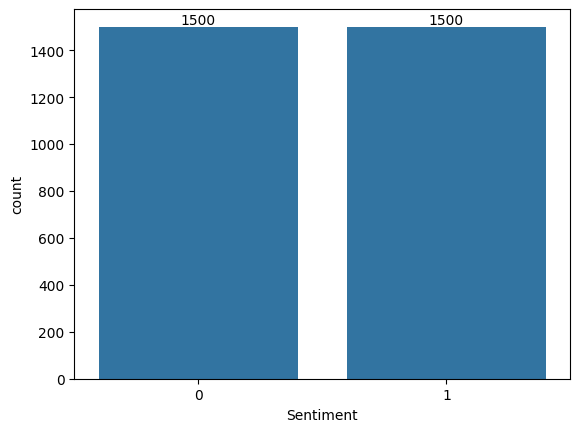

In [135]:
# visualize the data
from __future__ import annotations
ax = sns.countplot(x="Sentiment", data=combined_df, )
ax.bar_label(ax.containers[0])

##### Visualize Review Lengths

The histogram shows review length in number of characters on the x-axis and count on the y-axis. We can infer from the graph that most of the reviews are under 100 characters with very few reviews having more than 250 characters.

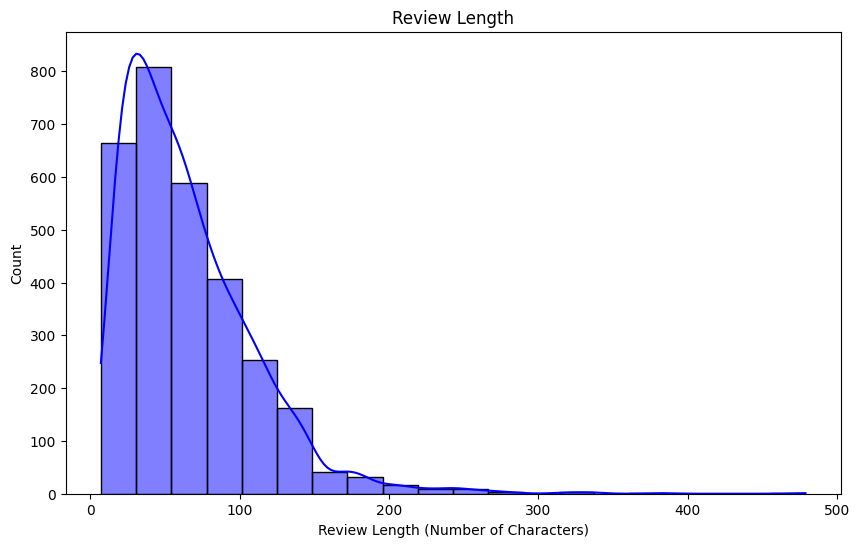

In [136]:
# visualize length of reviews using a histogram
df = combined_df.copy()
df["Review_Length"] = df["Review"].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df["Review_Length"], bins=20, kde=True, color='blue')
plt.title("Review Length")
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Count")
plt.show()

##### Check for Null Values

In [137]:
# check for null values
combined_df.isna().sum()

,0
Review,0
Sentiment,0


##### Make Reviews Lowercase

In [138]:
combined_df.Review = combined_df.Review.str.lower()

##### Remove Irregular Characters

In [139]:
# get initial character count of data
reviews=combined_df["Review"]
list_of_chars = []
for review in reviews:
  for character in review:
    if character not in list_of_chars:
      list_of_chars.append(character)
print(list_of_chars)
print("Initial Character Count: ", len(list_of_chars))

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']', 'é', 'ê', '\x96', '\x85', 'å', '\x97']
Initial Character Count:  63


In [140]:
# remove punctuation and irregular characters (emojis, non-english characters, numbers)
cleaned_df = combined_df.copy()

# removing brackets
cleaned_df["Review"] = cleaned_df["Review"].apply(lambda x: re.sub(r'[\[\]]', " ", x))

# removing special characters
pattern = re.compile('[^a-zA-z0-9\s]')
cleaned_df["Review"] = cleaned_df["Review"].apply(lambda x: re.sub(pattern, " ", x))
cleaned_df["Review"] = cleaned_df["Review"].apply(lambda x: re.sub(r'\x85', " ", x))

# removing numbers
pattern = re.compile('\d+')
cleaned_df["Review"] = cleaned_df["Review"].apply(lambda x: re.sub(pattern, " ", x))

In [141]:
# verify punctuation and irregular characters have been removed
cleaned_df.head()

,Review,Sentiment
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1


In [142]:
# check final character count of data after removing irregular characters and punctuation (should be 52)
reviews_clean=cleaned_df["Review"]
list_of_chars_clean = []
for review in reviews_clean:
  for character in review:
    if character not in list_of_chars_clean:
      list_of_chars_clean.append(character)
print(list_of_chars_clean)
print("Final Character Count: ", len(list_of_chars_clean))

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', 'z', 'q', 'k']
Final Character Count:  27


##### Initial Vocabulary Size

In [143]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_df["Review"])
vocab_size=len(tokenizer.word_index)+1
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  5092


##### *Tokenization*, Removal of Stop Words and *Lemmetization*

In [144]:
# define stop words
stop_words = set(stopwords.words("english"))
print(stop_words)

{'to', 'them', "she's", 'over', 'below', 'above', 'as', 'didn', 'me', 'under', 'wasn', 'we', 'during', "wasn't", "they'll", 'an', 'for', "mightn't", 'weren', 'these', 'will', 'him', 'yourselves', 've', 'no', "needn't", 'wouldn', 'needn', 'too', 'aren', 'doing', 'shan', 'they', 're', 'hers', 'so', "i'm", 'how', 'not', 'than', 'of', 'd', 'o', 'my', 'itself', 'against', 'don', 'where', 'off', 'themselves', "you've", 'all', 'such', 'while', "she'll", 'shouldn', 'between', "he'd", "it'll", 'who', "couldn't", 'each', "we're", 'have', 'he', 't', "they'd", "doesn't", 'is', "mustn't", 'after', 'should', "you're", 'do', 'few', 'whom', "won't", 'ourselves', 'his', "it'd", 'mustn', "he's", "shan't", "she'd", 'y', "hasn't", 'about', "we'd", 'further', 'himself', 'very', 'll', 'out', "he'll", 'couldn', 'can', 'some', 'are', 'when', "haven't", 'its', 'be', 'won', "shouldn't", "hadn't", 'ma', "don't", 'having', 'now', 'she', 'm', 'here', 'that', 'the', 'into', 'or', 'but', 'from', 'hasn', "i've", 'did

In [145]:
# define function to tokenize, remove stopwords and lemmetize the data
description_list=[]
def clean_reviews(review):


# tokenize
  review = nltk.word_tokenize(review)

# remove stopwords
  review = [word for word in review if not word in stop_words]
  description_list.append(review)

# lemmetize
  lemma=nltk.WordNetLemmatizer()
  review = [lemma.lemmatize(word) for word in review]

  return review


In [146]:
# apply function to data to tokenize, remove stop words and lemmetize the data
cleaned_df["Review"] = cleaned_df["Review"].apply(clean_reviews)

In [147]:
# view processed df
cleaned_df.head(10)

,Review,Sentiment
0,"[way, plug, u, unless, go, converter]",0
1,"[good, case, excellent, value]",1
2,"[great, jawbone]",1
3,"[tied, charger, conversation, lasting, minute,...",0
4,"[mic, great]",1
5,"[jiggle, plug, get, line, right, get, decent, ...",0
6,"[several, dozen, several, hundred, contact, im...",0
7,"[razr, owner, must]",1
8,"[needless, say, wasted, money]",0
9,"[waste, money, time]",0


##### Vocabulary Size After Removing Stop Words

In [148]:
# identify final vocabulary size after tokenization, removing stop words and lemmetization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_df["Review"])
vocab_size=len(tokenizer.word_index)+1
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  4559


##### Vectorization

In [149]:
# vectorize/ convert text data to sequences
sequences = tokenizer.texts_to_sequences(cleaned_df["Review"])

In [150]:
# view example of vectorized data
sequences[1]

[1, 56, 31, 304]

##### Calculate Word Embedding Length Using Vocab Size

In [151]:
# calculate embedding length
calculated_embedding_length = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
print("Calculated Word Embedding Length:", calculated_embedding_length)

Calculated Word Embedding Length: 8


##### Find Maximum Sequence Length

In [152]:
# identify minimum, maximum and median length of reviews after cleaning and vectorization
seq_len = [len(seq) for seq in sequences]

min_length = min(seq_len)
median_length = np.median(seq_len)
max_length = max(seq_len)

print("Minimum Review Length: ", min_length)
print("Median Review Length: ", median_length)
print("Maximum Review Length: ", max_length)

Minimum Review Length:  0
Median Review Length:  5.0
Maximum Review Length:  44


##### Padding

In [153]:
# pad the data to maximum review length (type=post)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")

In [154]:
# example of padded data
padded_sequences[1]

array([  1,  56,  31, 304,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=int32)

In [156]:
padded_sequences.shape

(3000, 44)

##### Split Data into Train and Test Data Sets

In [157]:
# split vectorized and padded data sets into training and test sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, cleaned_df.Sentiment, test_size=0.2, random_state=6)


In [158]:
# split original non vectorized data set
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(combined_df.Review, combined_df.Sentiment, test_size=0.2, random_state=6)

In [159]:
x_train = x_train.astype('float32') # Convert x_train to float32

y_train = y_train.astype('float32') # Convert y_train to float32

##### Export Processed Data

In [160]:
# save processed data to csv file
pd.DataFrame(x_train).to_csv("x_train.csv")
pd.DataFrame(x_test).to_csv("x_test.csv")
pd.DataFrame(y_train).to_csv("y_train.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

### C1. Model Summary


In [161]:
# define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=max_length),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [162]:
# compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


##### Stopping Criteria

In [163]:
# early stopping criteria
early_stopper = EarlyStopping(patience = 2)

# fit model
history = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=20, callbacks=[early_stopper])

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5177 - loss: 0.6931 - val_accuracy: 0.5333 - val_loss: 0.6895
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6641 - loss: 0.6752 - val_accuracy: 0.7458 - val_loss: 0.5854
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8541 - loss: 0.4617 - val_accuracy: 0.7812 - val_loss: 0.4503
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9083 - loss: 0.2413 - val_accuracy: 0.8021 - val_loss: 0.4580
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9437 - loss: 0.1611 - val_accuracy: 0.7917 - val_loss: 0.4977


##### Model Summary Function

In [164]:
# model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (32, 44, 100)               │         455,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (32, 44, 100)               │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (32, 44, 50)                │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_7           │ (32, 50)                    │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (32, 1)                     │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,413,305 (5.39 MB)

 Trainable params: 471,101 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 942,204 (3.59 MB)

### C2. Network Architecture

a. *Number and Types of Layers:*

There are a total of 5 layers in the neural network. Their types along with the number of parameters are given below;

  1. Input Layer: Embedding Layer- 455,900 parameters

The input layer of the network is an embedding layer that takes sequenced text as input and feeds it forward to the first hidden layer.

  2. Hidden Layer 1: Dense Layer - 10,100 parameters

This is the first hidden layer. It is a dense layer with 100 nodes. It receives input from the embedding layer and has a "relu" activation function.

  3. Hidden Layer 2: Dense Layer - 5,050 parameters

This is the second hidden layer with 50 nodes. It is a dense layer which receives input from the previous hidden layer. It also has a "relu" activation function.

  4. Global Average Pooling Layer -

  It is a pooling layer that takes an input dimension of (32, 44, 50) and reduces it to (32, 50). It computes the average output of each feature map of the preceeding layer and reduces its dimensions  to make the model ready for the last classification layer [(Habib, 2022)](#i-sources).

  5. Output Layer: Dense Layer -  51 parameters

The output layer is a dense layer with only one node. It has a sigmoid activation function that provides an output probability between 0 and 1 which determines the category the review is most likely to belong to.

b. *Total Number of Parameters* : 1,413,305

  - Trainable parameters: 471,101
  
  (These are the parameters that are updated during training - e.g. layer weights and biases)
  - Non-trainable parameters: 0

  (These parameters do not get updated during training.)


### C3. Hyperparameters

1. Activation Functions:

Activation functions transform the output from one layer to another.

ReLU (Rectified Linear Unit) was selected as the activation function for the hidden layers because it is computationally efficient and avoids the vanishing gradient problem.

The sigmoid activation function was selected for the output layer. It was selected because it provides an output value between 0 and 1 which works well with binary classification problems where the output is interpreted as a probability.


2. Number of Nodes Per Layer:

The number of nodes for the hidden layers was chosen arbitrarily based on the size of the available training data and the nature of the classification problem. The first hidden layer has 100 nodes and the second hdden layer has 50 nodes.

The output layer has only one node since this is a binary classification problem requiring an output of either 0 or 1.


3. Loss Function

The loss function used in the model is binary cross entropy since this is a classification analysis with binary categories of 0 and 1.

4. Optimizer:

The optimizer used for this analysis is "adam" since it is easy to implement, computationally efficient and combines the best aspects of other optimziers. It iteratively adjusts weights and adapts the learning rate thus effectively reducing overfitting.


5. Stopping Criteria:

Early stopping criteria was used  to prevent the model from overfitting and
improving the generalization of the final model. The number of training epochs set for the model is 20. However, with the implementatons of the EarlyStopping() method from keras, the model stops training early if the validation loss does not improve for the given number of epochs. For this analysis, the patience was set to 2.

6. Evaluation Metric:

The evaluation metric used to determine how well the model classifies customer reviews is accuracy. It is the ratio of the number of correct predictions to the total number of input samples, expressed as a percentage. This metric was selected because it is commonly used and easy to interpret.

The accuracies of the training and validation sets in the last epoch were 94.37% and 79.17% repectively.



### D1. Stopping Criteria

Overfitting occurs when a model is fit too closely to the training data and cannot generalise well with new data. An early stopping criteria can be used to prevent it.

The stopping criteria used for this analysis was the EarlyStopping() method from tensorflow.keras.callbacks with patience=2. This means that model training will stop if validation loss fails to improve for two continuous epochs.

From the training process, it is clear that validation loss decreases from epoch 1 to 2 and 2 to 3. However, the validation loss increases from epoch 3 to 4 and again from epoch 4 to 5. This causes the model to stop training early since the early stopping criteria has been met (even though the number of epochs initially provided was 20). If the model continues training beyond this point, it would only lead to worsening results.

![Screenshot 2025-02-25 at 2.00.03 AM.png](<attachment:Screenshot 2025-02-25 at 2.00.03 AM.png>)
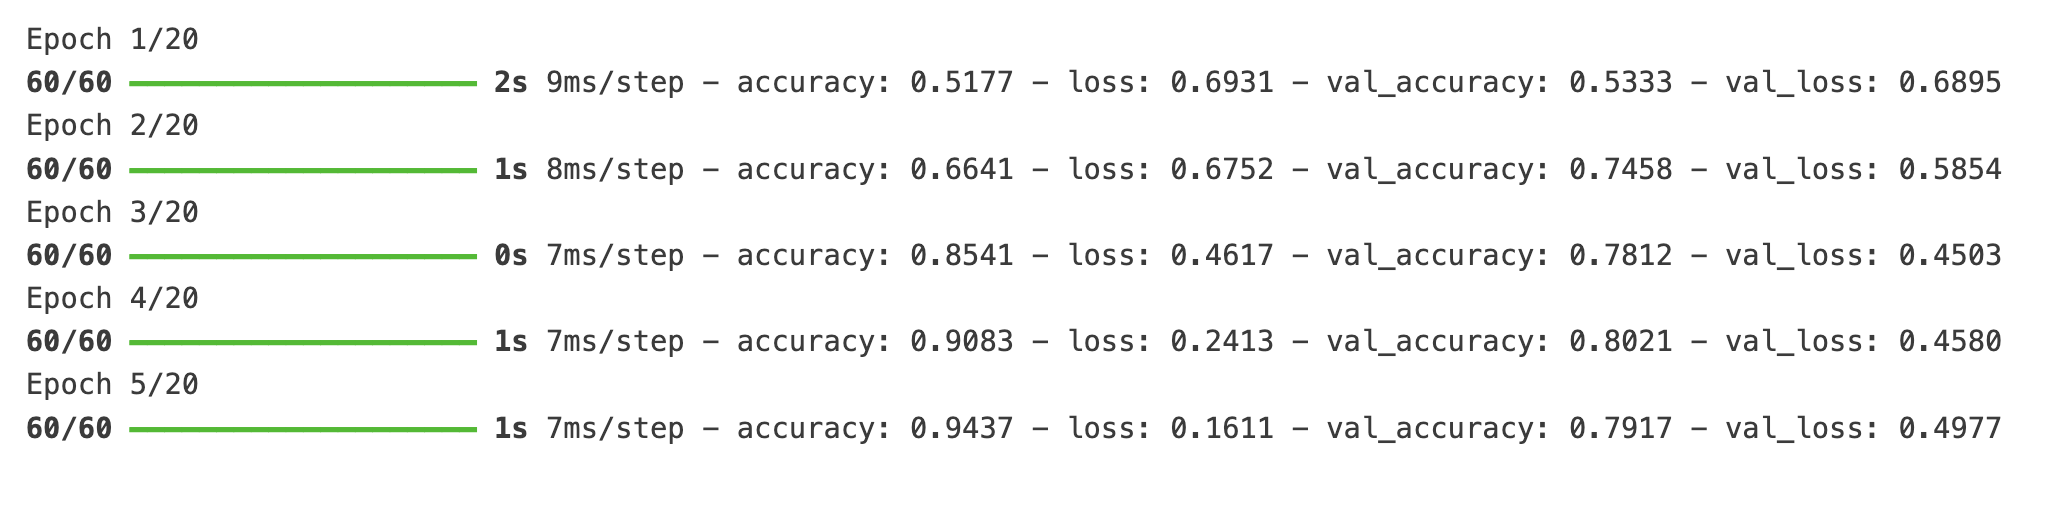

### D2. Fitness

Overfitting was prevented when building the model by defining an early stopping criteria with patience of 2. This ensures that the model stops training if validation loss does not improve for 2 consecutive epochs.

The fitness of the model was then assessed by visualizing the training and validation accuracies and loss (see next section). From these plots, it is clear that both training and validation accuracies are above 75% at the end of the last training epoch. Further, the training is stopped before validation loss starts to rise for more than 2 epochs. This indicates a good model without any obvious over or underfitting.



### D3. Training Process

The training process of the model is depicted below.

Accuracy and loss are plotted for both training and validation sets.
Both graphs show the epoch number on the x-axis with accuracy and loss on the y-axis.

In the plot for accuracy, both training and validation accuracies increase from epochs 1 to 4. The final training accuracy is higher than the final validation accuracy, but both are above 75%.  

In the plot depicting loss, the training loss steadily decreases over all 4 epochs to less than 0.2. However, the validation loss decreases till the second epoch and then increases up to the fourth epoch. This corresponds with the early stopping criteria provided wherein model fitting stops after loss increases for two continuous epochs (patience=2). Hence the training stops at epoch 4 when loss has increased consecutively over the past two epochs.




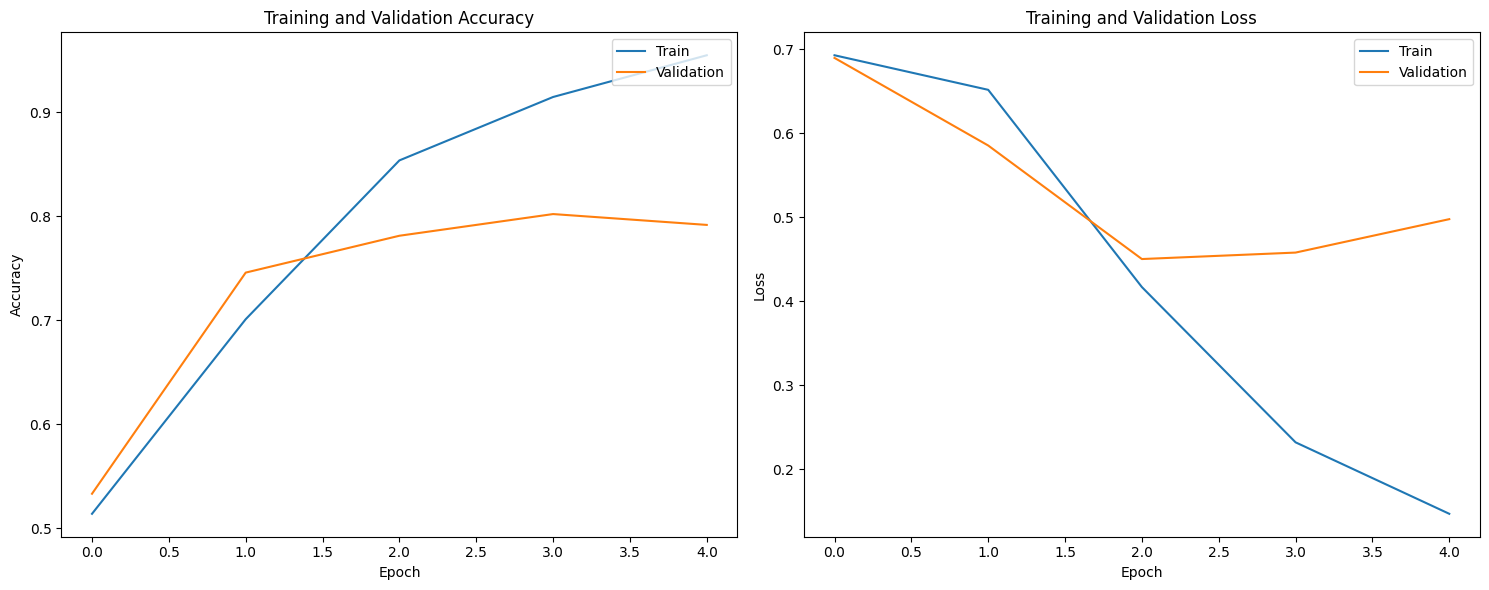

In [165]:
# plot accuracy and loss in training and validation sets
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.tight_layout()
plt.show()

### D4. Predictive Accuracy

Accuracy is the number of correct predictions divided by the total number of predicitons. It is expressed as a percentage. A higher predictive accuracy indicates a better model. For this model,

Training Accuracy:  93.58%

Test Accuracy:  80.67%

The testing accuracy is high indicating a good model. Also, the difference between the two accuracies is less than 15%. This shows that the model is good as per indutry standards since the difference between training and testing accuracies should be between 5%-15%.

Loss is the sum of the errors made for each sample in the training and validation sets [(AI Wiki, n.d.)](#i-sources). The loss function used for this model is binary cross entropy since this is a binary classification problem. A lower loss indicates a better model. The loss for the training and test sets are;

Training Loss:  0.184542 and Test Loss:  0.515179

The loss of the validation set appears to be higher than the training set at the end of epoch 4. This is something that could be improved by training the model on more data.


In [166]:
# perform predictions on test data set
predictions = my_model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [167]:
# compare predicted sentiment with actual sentiment on test data

# select random review from test data set
i = 4

print("Review from test data set: ", x_test_original.iloc[i])
print("Predicted sentiment: ", "Positive Review" if predictions[i][0]>=0.5 else "Negative Review")
print("Actual Sentiment: ", "Positive Review" if y_test.iloc[i] == 1 else "Negative Review")

Review from test data set:  i have had this phone for over a year now, and i will tell you, its not that great.
Predicted sentiment:  Positive Review
Actual Sentiment:  Negative Review


In [168]:
# calculate training accuracy and loss
training_score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", training_score[1])
print("Training Loss: ", training_score[0])

Training Accuracy:  0.9358333349227905
Training Loss:  0.18471390008926392


In [169]:
# calculate model accuracy and loss with test data
test_score = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: ", test_score[1])
print("Test Loss: ", test_score[0])

Test Accuracy:  0.8066666722297668
Test Loss:  0.509948194026947


### E. Code to Save Model

The code used to save the final trained network is provided below.

In [170]:
# save model
model.save("my_model.keras")

### F. Functionality

This neural network functions as a binary classifer for sentiment analysis of customer reviews. It can be used to categorise customer feedback as either positive (1) or negative(0).
The input layer of the network is an embedding layer that takes sequenced text as input and feeds it forward to the first hidden layer. The two hidden layers that come next perform computations on the data. They have 100 and 50 nodes respectively with "relu" activation functions. The nodes apply weights to the inputs and the activation functions introduce non-linearity so that the network can perform more complex calculations. The next layer is a pooling layer that reduces the dimensions of the input data. It computes the average output of each feature map of the preceeding layer and reduces its dimensions to make the model ready for the last classification layer [(Habib, 2022)](#i-sources).
The last layer is the output layer with only one node. It has a sigmoid activation function that provides an output probability between 0 and 1. This determines which category the review is most likely to belong to.
In this way, the neural netowork can take sequenced customer review data and categorise it as positive or negative.


### G. Recommendations

I was able to answer the initial research question as to whether it is possible to build a neural network that is able to accurately classify a review as positive or negative. Since the testing accuracy of the model is above 75%, it is clear that it is possible to build such a model.

This neural network has a high enough test accuracy that it can be used in a real-world environment.
Some of the possible applications for this model include customer satisfaction analysis and evaluating feedback on new product launches.
I would also recommend collecting more customer review data for model training to improve its predictive accuracy even further.


### H. Reporting

This report along with the analysis code has been submitted as a jupyter notbook (.ipynb) and a pdf document.

### I. Sources

1. Kotzias, D. (2015). *Sentiment Labelled Sentences [Dataset].* UCI Machine Learning Repository.
https://doi.org/10.24432/C57604.

2. Kwan, Matthew. (26 September 2023). *Finding the optimal number of dimensions for word embeddings.* Medium.
https://medium.com/@matti.kwan/finding-the-optimal-number-of-dimensions-for-word-embeddings-f19f71666723#:~:text=In%20other%20words%2C%20what%27s%20the,numbers%20like%20100%20or%20300.

3. AI Wiki. (n.d.) *Accuracy and Loss.*
https://machine-learning.paperspace.com/wiki/accuracy-and-loss.

4. Habib, Gousia. (15 November 2022). *GAPCNN with HyPar: Global Average Pooling convolutional neural network with novel NNLU activation function and HYBRID parallelism.* Frontiers.
https://www.frontiersin.org/journals/computational-neuroscience/articles/10.3389/fncom.2022.1004988/full.